In [1]:
import pandas as pd
metrics = pd.read_excel("metrics_.xlsx")

In [5]:
metrics.Author.value_counts()

Author
Paul Graham     161
Robin Hanson    142
Paul Krugman     52
Mark_Twain       43
Name: count, dtype: int64

In [11]:
Graham = metrics[metrics["Author"] == "Paul Graham"]
Hanson = metrics[metrics["Author"] == "Robin Hanson"]
Twain = metrics[metrics["Author"] == "Mark_Twain"]
Krugman = metrics[metrics["Author"] == "Paul Krugman"]

In [27]:
baseline_df = Twain[[col for col in Twain.columns if "baseline" in col]]
column_sums = baseline_df.sum()
sums_df_base = pd.DataFrame([column_sums], columns=baseline_df.columns)
sums_df_base

,Text_Similarity_baseline,POS_Similarity_baseline,Sentence_Length_Similarity_baseline,TF-IDF_Similarity_Unigram_baseline,TF-IDF_Similarity_Bigram_baseline,TF-IDF_Similarity_Trigram_baseline,Transformer_Similarity_baseline,Stopwords_Similarity_baseline,Punctuation_Similarity_baseline,TTR_Similarity_baseline
0,7.718,40.8159,29.2538,13.6595,2.0738,0.4508,19.7494,41.2053,38.3008,38.6088


In [49]:
prediction_df = Twain[[col for col in Twain.columns if "prediction" in col]]
column_sums = prediction_df.sum()
sums_df_pred = pd.DataFrame([column_sums], columns=prediction_df.columns)
sums_df_pred["Author"] = "Twain"
new_cols = ["Author"] + list(sums_df_pred.columns[:-1])
sums_df_pred = sums_df_pred[new_cols]
sums_df_pred

,Author,Text_Similarity_prediction,POS_Similarity_prediction,Sentence_Length_Similarity_prediction,TF-IDF_Similarity_Unigram_prediction,TF-IDF_Similarity_Bigram_prediction,TF-IDF_Similarity_Trigram_prediction,Transformer_Similarity_prediction,Stopwords_Similarity_prediction,Punctuation_Similarity_prediction,TTR_Similarity_prediction
0,Twain,6.2019,38.0782,28.4284,11.8169,2.2631,0.5447,17.7986,39.115,36.7174,19.9359


In [67]:
def filterings_(auth, variable, author):
    df = auth[[col for col in auth.columns if variable in col]]
    column_sums = df.sum()
    sums_df = pd.DataFrame([column_sums], columns=df.columns)
    sums_df["Author"] = author
    new_cols = ["Author"] + list(df.columns)  # Use df.columns instead
    sums_df = sums_df[new_cols]
    return sums_df

In [75]:
predictions = filterings_(Twain, "prediction", "Twain")

In [119]:
predictions = filterings_(Twain, "prediction", "Twain")
predictions = pd.concat([predictions, filterings_(Graham, "prediction", "Graham")], ignore_index=True)
predictions = pd.concat([predictions, filterings_(Krugman, "prediction", "Krugman")], ignore_index=True)
predictions = pd.concat([predictions, filterings_(Hanson, "prediction", "Hanson")], ignore_index=True)
baselines = filterings_(Twain, "baseline", "Twain")
baselines = pd.concat([baselines, filterings_(Graham, "baseline", "Graham")], ignore_index=True)
baselines = pd.concat([baselines, filterings_(Krugman, "baseline", "Krugman")], ignore_index=True)
baselines = pd.concat([baselines, filterings_(Hanson, "baseline", "Hanson")], ignore_index=True)

In [121]:
baselines['n-gram-mean'] = baselines[['TF-IDF_Similarity_Unigram_baseline', 'TF-IDF_Similarity_Bigram_baseline', 'TF-IDF_Similarity_Trigram_baseline']].mean(axis=1)
baselines.drop(columns=['TF-IDF_Similarity_Unigram_baseline', 'TF-IDF_Similarity_Bigram_baseline','TF-IDF_Similarity_Trigram_baseline'], inplace=True)


predictions['n-gram-mean'] = predictions[['TF-IDF_Similarity_Unigram_prediction', 'TF-IDF_Similarity_Bigram_prediction', 'TF-IDF_Similarity_Trigram_prediction']].mean(axis=1)
predictions.drop(columns=['TF-IDF_Similarity_Unigram_prediction', 'TF-IDF_Similarity_Bigram_prediction','TF-IDF_Similarity_Trigram_prediction'], inplace=True)

In [123]:
baselines

,Author,Text_Similarity_baseline,POS_Similarity_baseline,Sentence_Length_Similarity_baseline,Transformer_Similarity_baseline,Stopwords_Similarity_baseline,Punctuation_Similarity_baseline,TTR_Similarity_baseline,n-gram-mean
0,Twain,7.7180,40.8159,29.2538,19.7494,41.2053,38.3008,38.6088,5.394700
1,Graham,44.2976,155.9092,143.1570,85.1204,157.1855,155.0472,147.8130,25.359200
2,Krugman,11.5039,50.7206,44.0323,24.0873,50.7090,50.5351,47.6223,6.758867
3,Hanson,34.3169,137.1637,120.5153,71.8428,136.9436,137.0851,129.0284,19.061067


In [125]:
predictions

,Author,Text_Similarity_prediction,POS_Similarity_prediction,Sentence_Length_Similarity_prediction,Transformer_Similarity_prediction,Stopwords_Similarity_prediction,Punctuation_Similarity_prediction,TTR_Similarity_prediction,n-gram-mean
0,Twain,6.2019,38.0782,28.4284,17.7986,39.1150,36.7174,19.9359,4.874900
1,Graham,37.9046,148.5036,134.1038,87.2691,153.2900,150.7288,94.6509,24.841533
2,Krugman,9.4035,48.2064,38.7333,24.4606,49.4383,49.0011,27.5638,6.500200
3,Hanson,34.4501,130.3086,114.0197,76.7004,132.6400,133.5827,81.9363,20.283567


In [129]:
baselines['Overall_Score'] = (
    0.1 * baselines['POS_Similarity_baseline'] +
    0.1 * baselines['Sentence_Length_Similarity_baseline'] +
    0.1 * baselines['Punctuation_Similarity_baseline'] +
    0.1 * baselines['Stopwords_Similarity_baseline'] +
    0.2 * baselines['TTR_Similarity_baseline'] +
    0.2 * baselines['Transformer_Similarity_baseline'] +
    0.2 * baselines['n-gram-mean']
)

In [133]:
predictions['Overall_Score'] = (
    0.1 * predictions['POS_Similarity_prediction'] +
    0.1 * predictions['Sentence_Length_Similarity_prediction'] +
    0.1 * predictions['Punctuation_Similarity_prediction'] +
    0.1 * predictions['Stopwords_Similarity_prediction'] +
    0.2 * predictions['TTR_Similarity_prediction'] +
    0.2 * predictions['Transformer_Similarity_prediction'] +
    0.2 * predictions['n-gram-mean']
)


In [137]:
combined_scores = pd.merge(
    baselines[['Author', 'Overall_Score']].rename(columns={'Overall_Score': 'Baseline_Score'}),
    predictions[['Author', 'Overall_Score']].rename(columns={'Overall_Score': 'Prediction_Score'}),
    on='Author',
    how='inner'  # or 'outer' if you want all authors from both
)

In [159]:
combined_scores["Author"] = ["Mark_Twain", "Paul Graham", "Paul Krugman", "Robin Hanson"]
author_counts = metrics['Author'].value_counts()
combined_scores['Author_Count'] = combined_scores['Author'].map(author_counts)
combined_scores["Baseline_Score"] = combined_scores["Baseline_Score"] / combined_scores["Author_Count"]
combined_scores["Prediction_Score"] = combined_scores["Prediction_Score"] / combined_scores["Author_Count"]
combined_scores["Total"] = combined_scores["Baseline_Score"] - combined_scores["Prediction_Score"]
combined_scores

,Author,Baseline_Score,Prediction_Score,Author_Count
0,Mark_Twain,0.014985,0.012307,43
1,Paul Graham,0.004351,0.003858,161
2,Paul Krugman,0.013052,0.011184,52
3,Robin Hanson,0.004818,0.004307,142


# Transformer similarity


# Plotting results

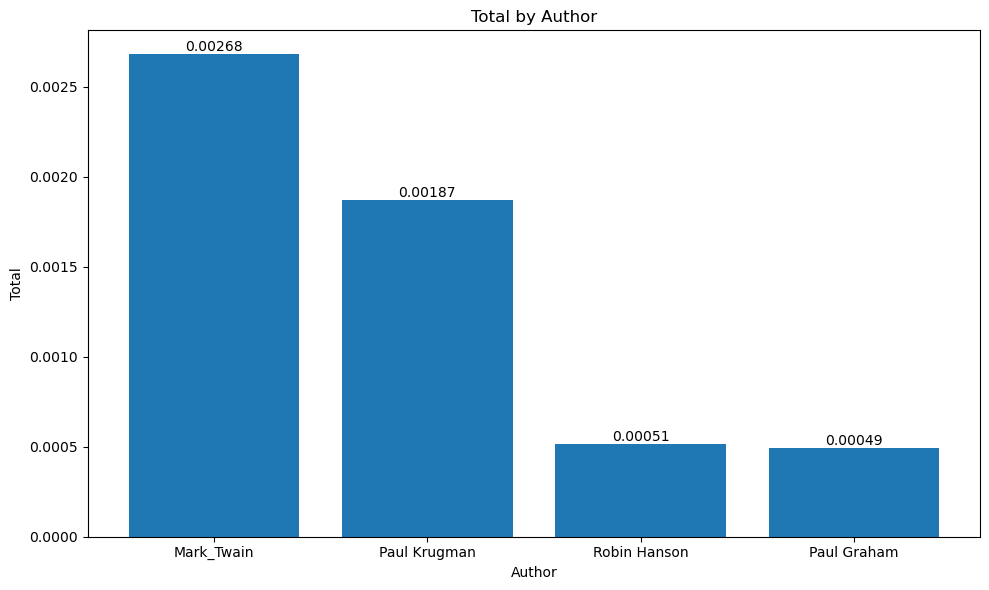

In [211]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Total' in descending order
sorted_scores = combined_scores.sort_values(by='Total', ascending=False)

# Barplot for the 'Total' column by Author
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_scores['Author'], sorted_scores['Total'])

plt.xlabel('Author')
plt.ylabel('Total')
plt.title('Total by Author')
plt.xticks(rotation=0)

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.5f}',
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()


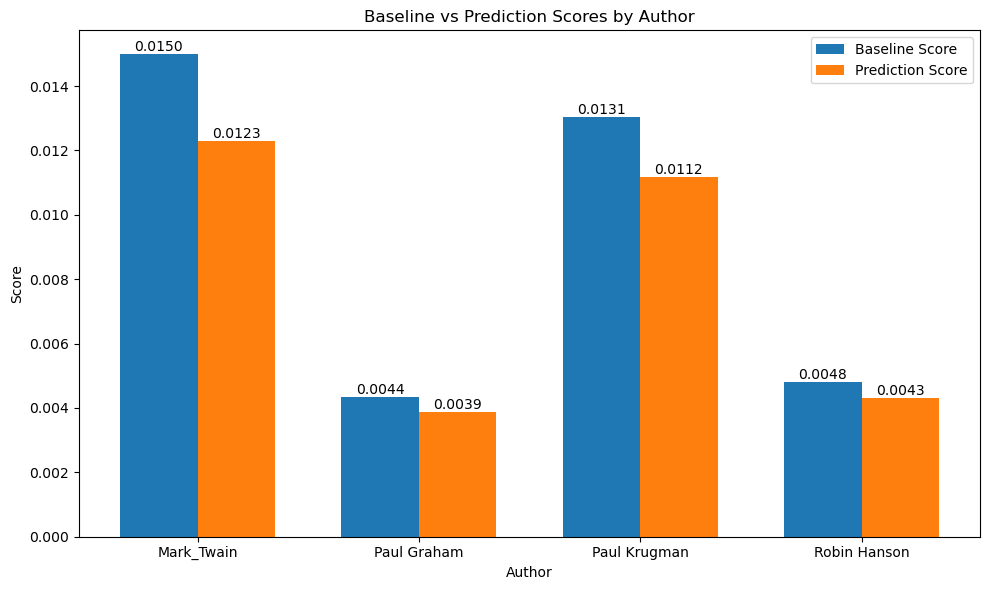

In [201]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(combined_scores))
bar_width = 0.35

# Bars for Baseline and Prediction
baseline_bars = ax.bar([i - bar_width/2 for i in x], combined_scores['Baseline_Score'], width=bar_width, label='Baseline Score')
prediction_bars = ax.bar([i + bar_width/2 for i in x], combined_scores['Prediction_Score'], width=bar_width, label='Prediction Score')

# Add score labels on top of each bar
for i, bar in enumerate(baseline_bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom')

for i, bar in enumerate(prediction_bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom')

# Labels and title
ax.set_xlabel('Author')
ax.set_ylabel('Score')
ax.set_title('Baseline vs Prediction Scores by Author')
ax.set_xticks(x)
ax.set_xticklabels(combined_scores['Author'], rotation=0)
ax.legend()

plt.tight_layout()
plt.show()